# Prithvi Model Example

This notebook demonstrates how to use the Prithvi model for satellite image reconstruction.

In [ ]:
# %pip install geoai-py

## Import Libraries

In [1]:
import geoai
import matplotlib.pyplot as plt

## Define Input Files

Specify the paths to the satellite images for processing.

In [2]:
file_paths = ["asset/Mexico_HLS.S30.T13REM.2018026T173609.v2.0_cropped.tif",
              "asset/Mexico_HLS.S30.T13REM.2018106T172859.v2.0_cropped.tif",
              "asset/Mexico_HLS.S30.T13REM.2018201T172901.v2.0_cropped.tif",
              "asset/Mexico_HLS.S30.T13REM.2018266T173029.v2.0_cropped.tif"]

## Simple One-Line Inference

Run inference using the simplified API.

In [3]:
geoai.prithvi_inference(
    file_paths=file_paths,
    output_dir="results"
)

config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

Prithvi_EO_V2_300M_TL.pt:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

## Advanced Processing with Processor

Load the model and process files with custom parameters.

In [4]:
processor = geoai.load_prithvi_model()
output_dir = "results"
processor.process_files(file_paths, output_dir, mask_ratio=0.75)

## Visualize Results

Process images and extract tensors for visualization.

In [5]:
input_tensor, rec_tensor, mask_tensor = processor.process_images(
    file_paths=file_paths,
    mask_ratio=0.75,
)

In [6]:
original_rgb, masked_rgb, reconstructed_rgb = processor.visualize_rgb(
    input_tensor, rec_tensor, mask_tensor
)

## Plot Comparison

Display the original, masked, and reconstructed images side by side.

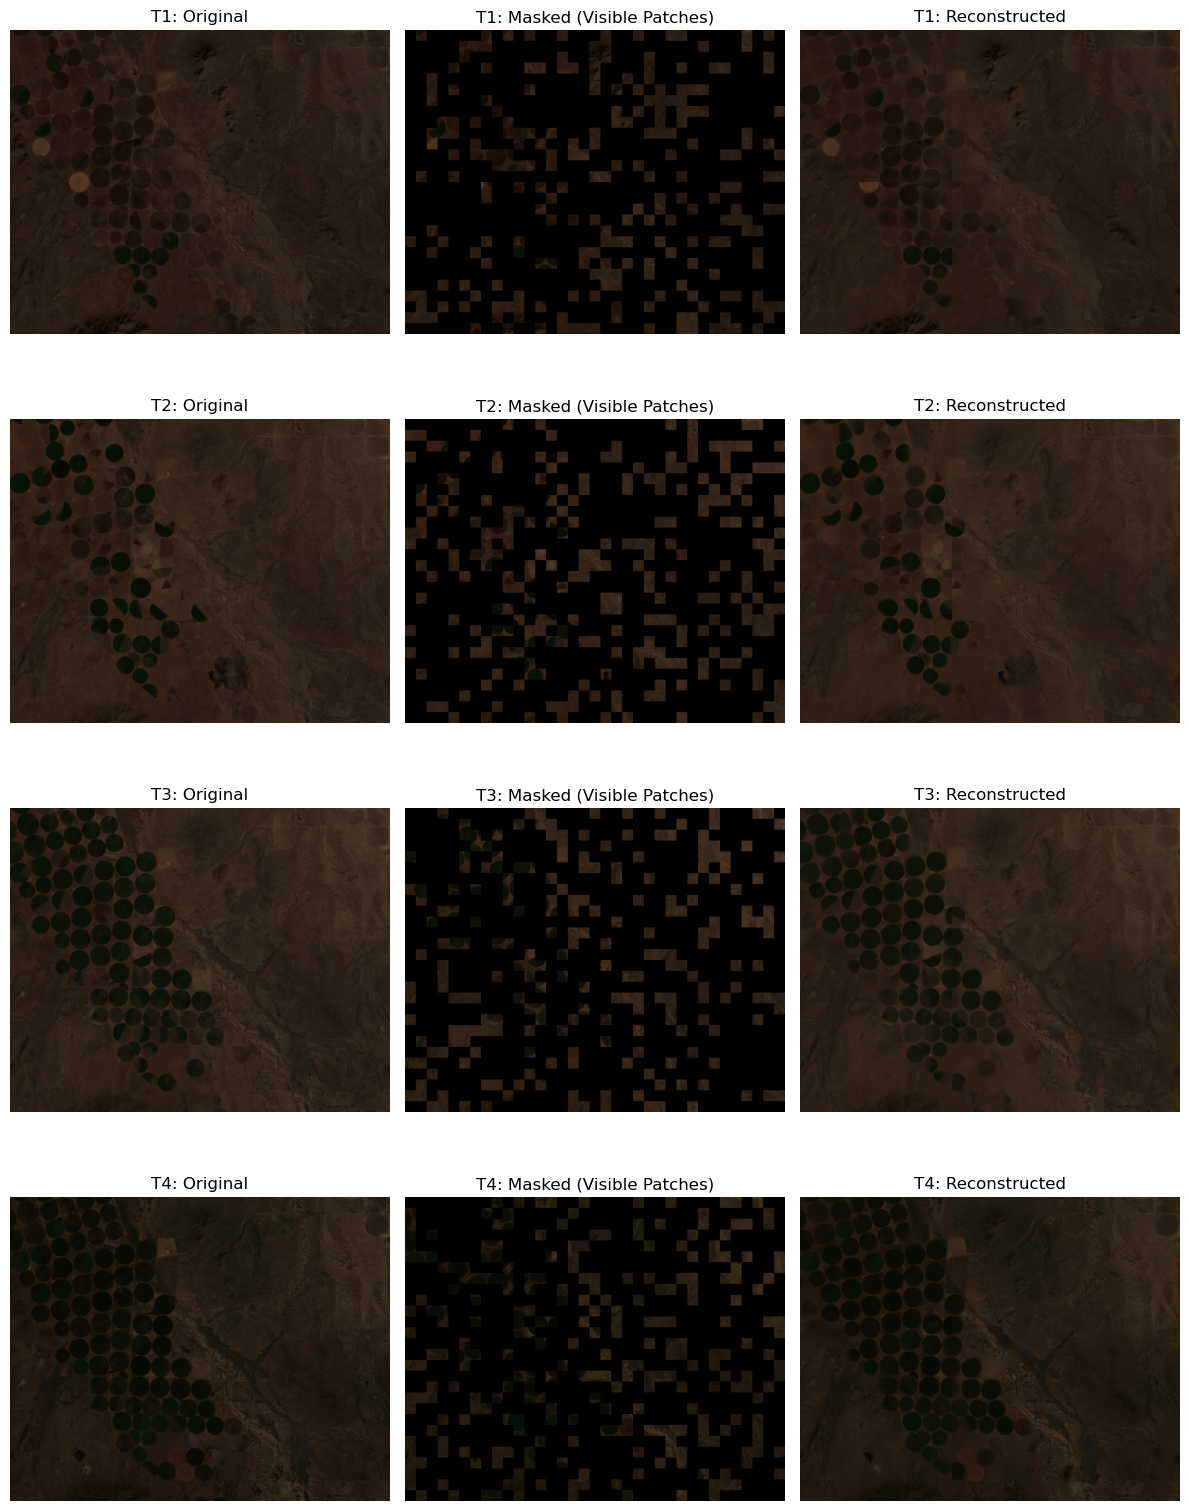

In [7]:
num_timestamps = len(original_rgb)
fig, axes = plt.subplots(num_timestamps, 3, figsize=(12, 4 * num_timestamps))

if num_timestamps == 1:
    axes = axes.reshape(1, -1)

column_titles = ["Original", "Masked (Visible Patches)", "Reconstructed"]

for t in range(num_timestamps):
    axes[t, 0].imshow(original_rgb[t])
    axes[t, 0].set_title(f"T{t+1}: {column_titles[0]}")
    axes[t, 0].axis("off")
    
    axes[t, 1].imshow(masked_rgb[t])
    axes[t, 1].set_title(f"T{t+1}: {column_titles[1]}")
    axes[t, 1].axis("off")
    
    axes[t, 2].imshow(reconstructed_rgb[t])
    axes[t, 2].set_title(f"T{t+1}: {column_titles[2]}")
    axes[t, 2].axis("off")

plt.tight_layout()
plt.show()